In [1]:
import pandas as pd

df_ins = pd.read_csv(r'C:\Users\camde\OneDrive - Brigham Young University\IS JUNIOR CORE-Camdens-Laptop\IS 455\univariate_automation\insurance.csv')
df_nba = pd.read_csv(r'C:\Users\camde\OneDrive - Brigham Young University\IS JUNIOR CORE-Camdens-Laptop\IS 455\nbastats\nba_salaries.csv')
df_air = pd.read_csv(r'C:\Users\camde\OneDrive - Brigham Young University\IS JUNIOR CORE-Camdens-Laptop\IS 455\univariate_automation\airline_satisfaction.csv')
df_bnb = pd.read_csv(r'C:\Users\camde\OneDrive - Brigham Young University\IS JUNIOR CORE-Camdens-Laptop\IS 455\univariate_automation\listings.csv')




In [17]:
def bivariate(df, label, roundto=4):
    import pandas as pd
    from scipy import stats
    
    df_results = pd.DataFrame(columns=['p', 'r', 'y = m(x) + b', 'F', 'X2'])

    for feat in df.columns:
        if feat != label:
            # N2N relatinships
            if pd.api.types.is_numeric_dtype(df[feat]) and pd.api.types.is_numeric_dtype(df[label]):
                m, b, r, p, err = stats.linregress(df[feat], df[label])

                df_results.loc[feat] = [round(p, roundto), round(r, roundto), f"y = {round(m, roundto)}(x) + {round(b,roundto)}", "", ""]

            # C2C relationships
            elif not pd.api.types.is_numeric_dtype(df[feat]) and not pd.api.types.is_numeric_dtype(df[label]):
                contingency_table = pd.crosstab(df[feat], df[label])
                X2, p, dof, expectancy = stats.chi2_contingency(contingency_table)

                df_results.loc[feat] = [round(p, roundto), "", "", "", round(X2, roundto)]

            #C2N relationships
            else:
                if pd.api.types.is_numeric_dtype(df[feat]):
                    num = feat
                    cat = label
                else:
                    num = label
                    cat = feat

                group_lists = []
                groups = df[cat].unique()
                for g in groups:
                    #        df[df[sex] == f][charges]
                    g_list = df[df[cat] == g][num]
                    group_lists.append(g_list)

                F, p = stats.f_oneway(*group_lists)

                df_results.loc[feat] = [round(p, roundto), "", "", round(F, roundto), ""]

    return df_results.sort_values(by=['p'])

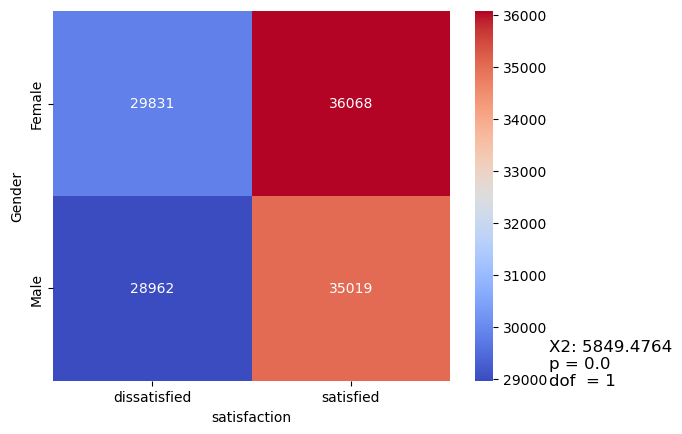

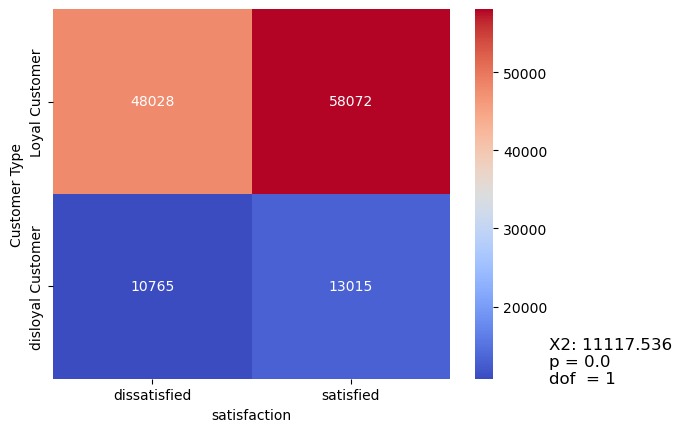

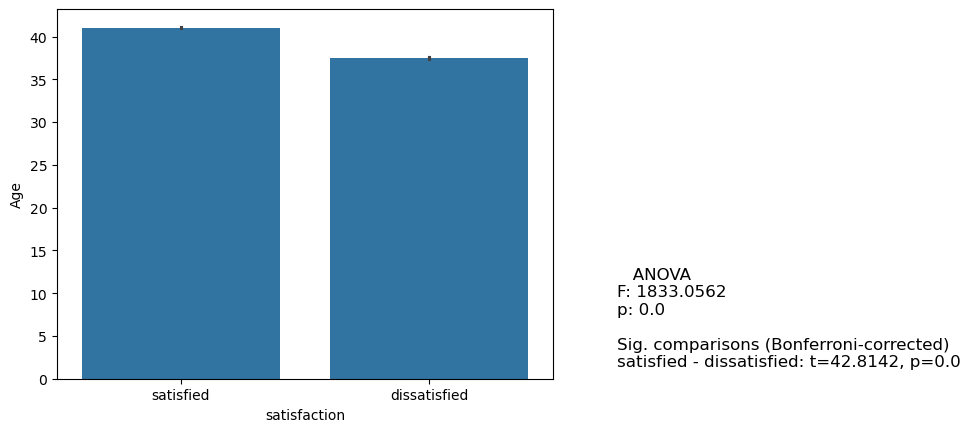

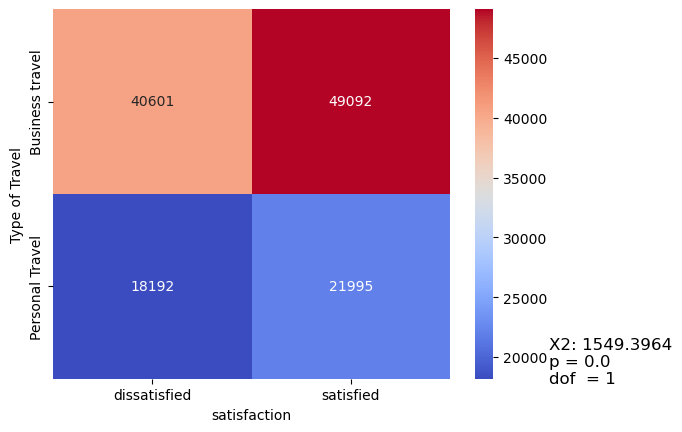

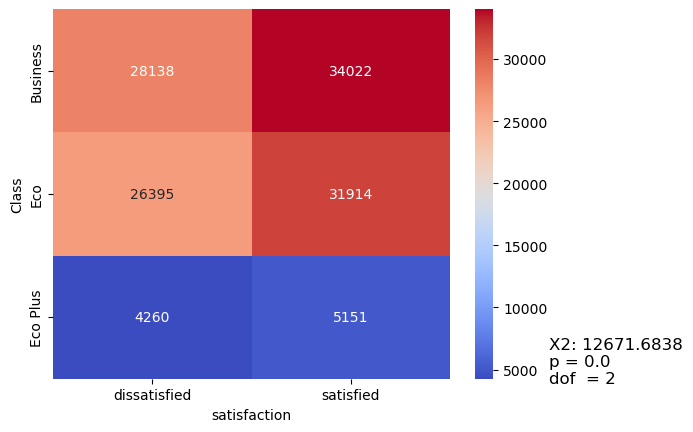

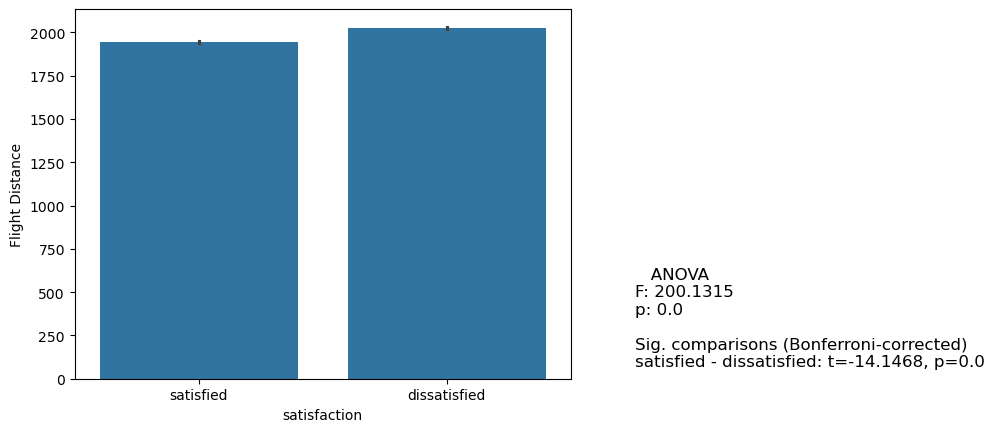

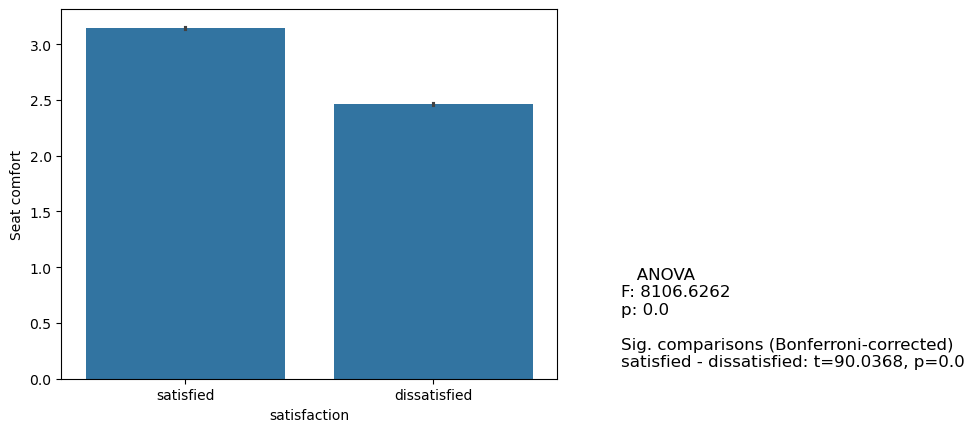

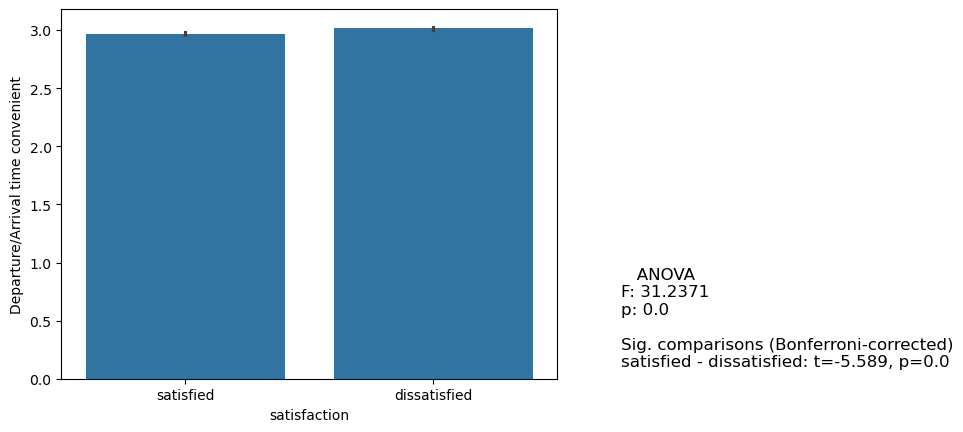

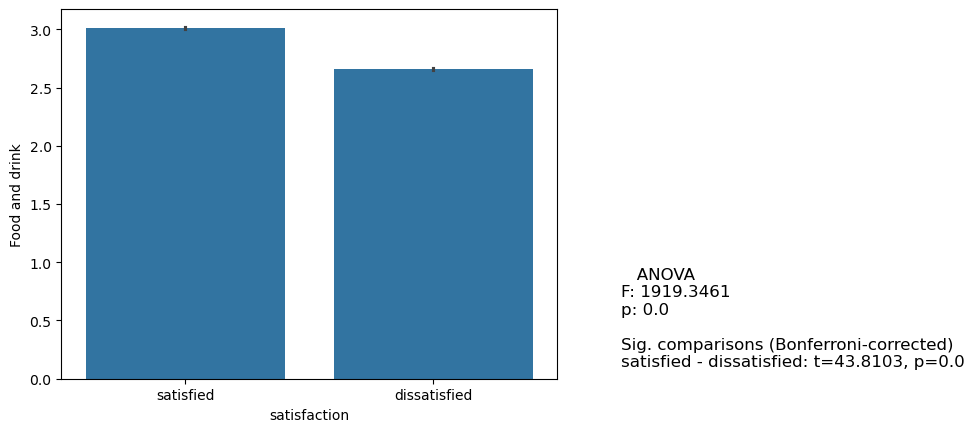

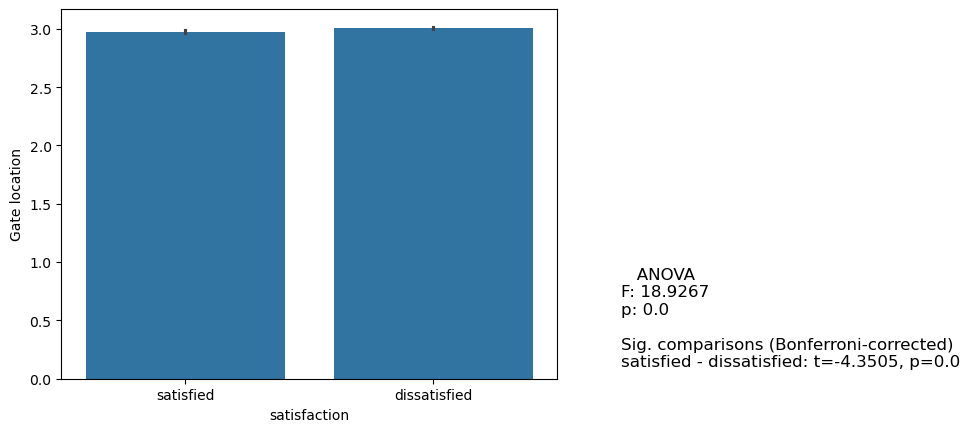

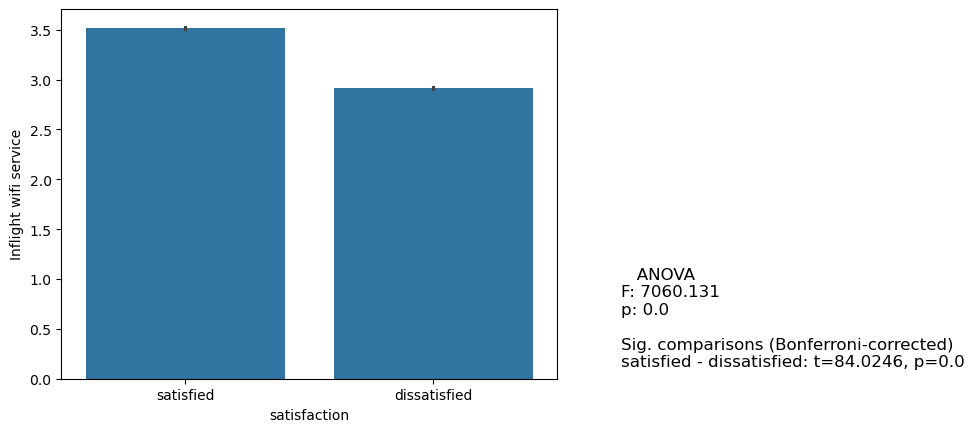

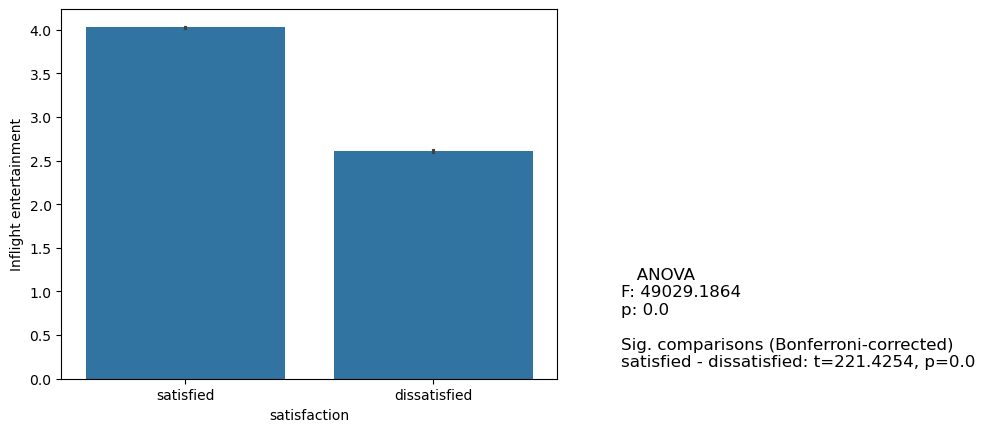

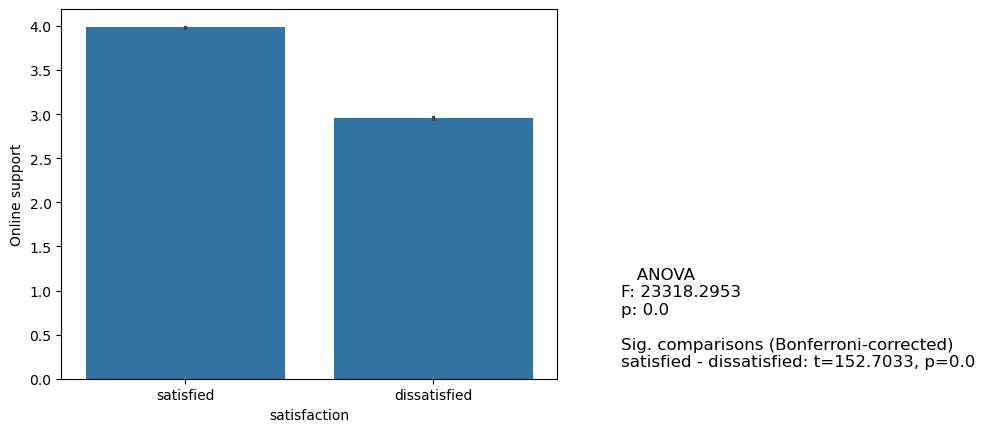

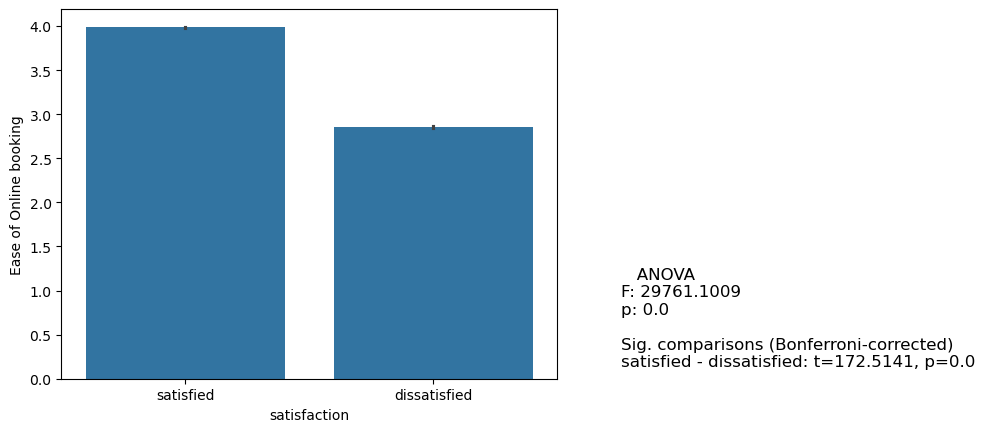

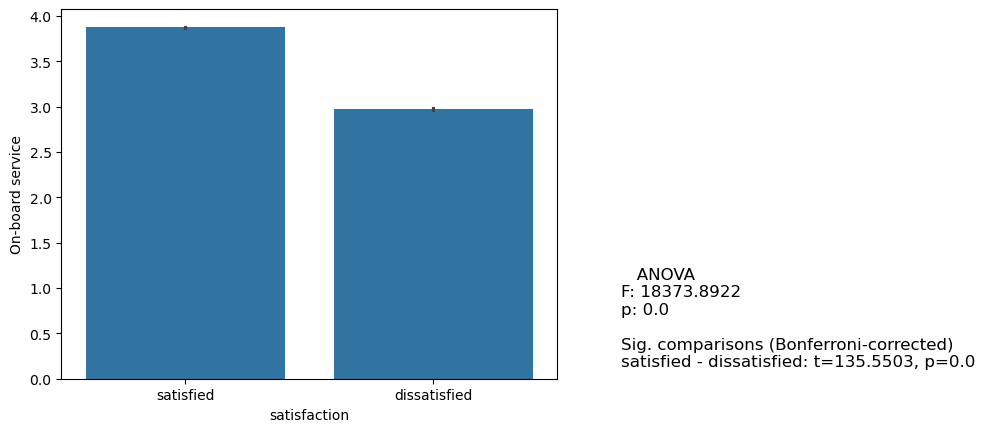

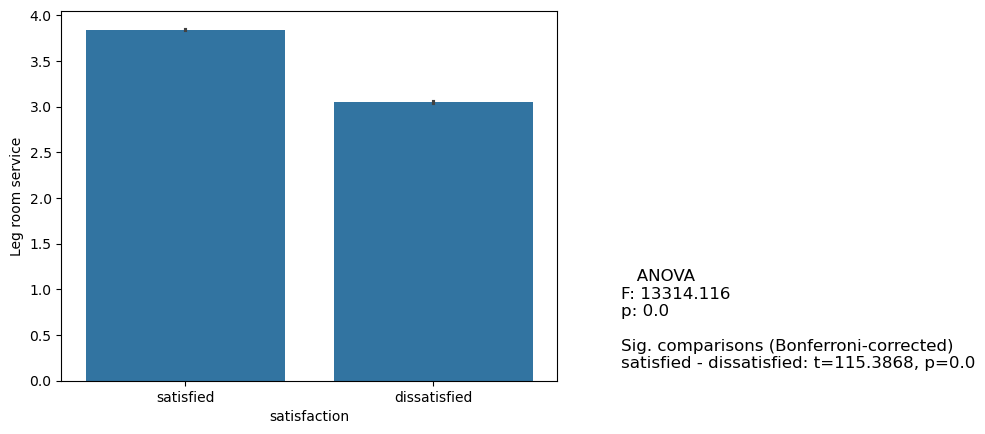

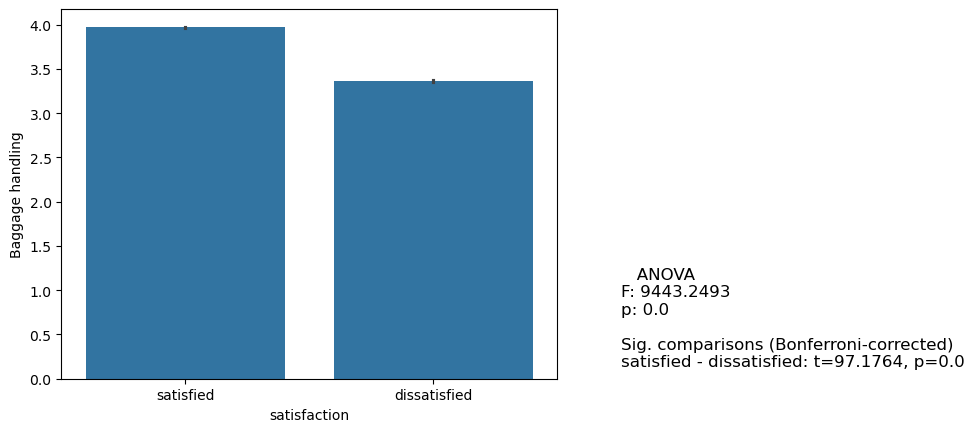

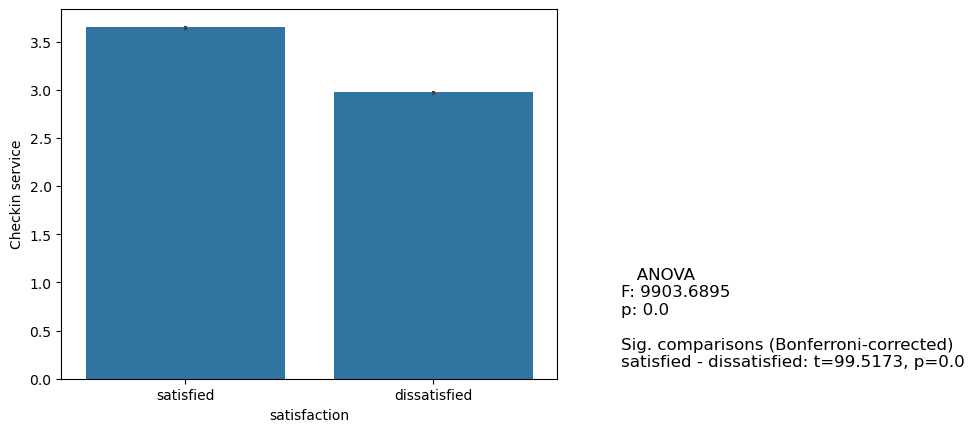

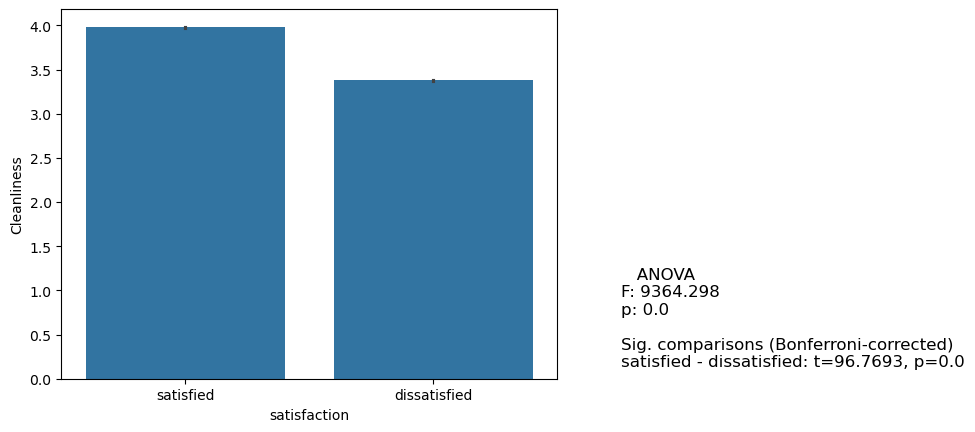

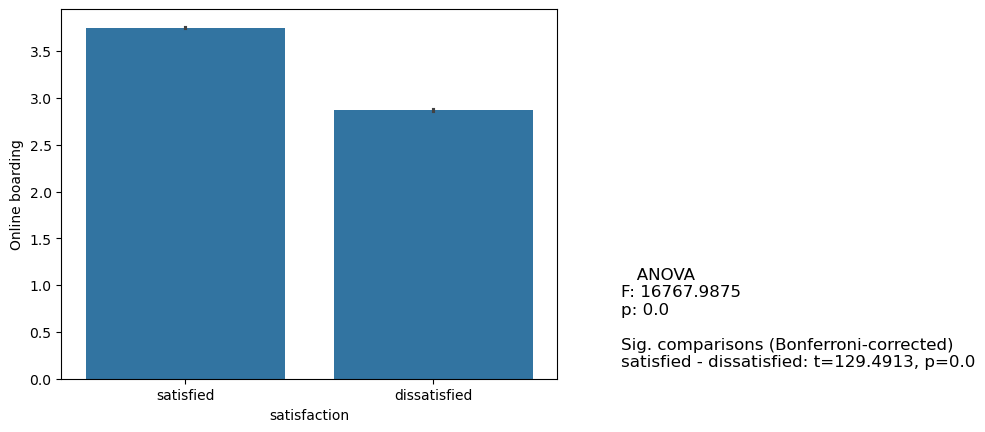

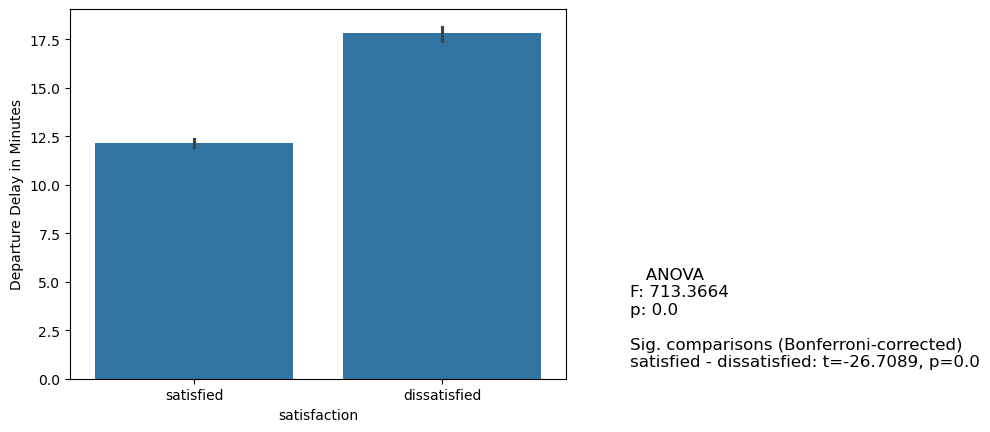

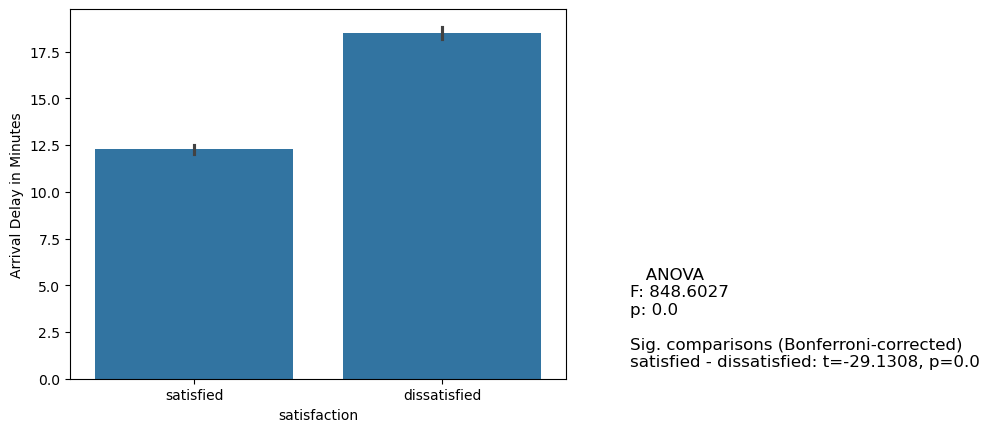

,missing,p,r,τ,ρ,y = m(x) + b,F,X2,skew,unique,values
Gender,0.00%,0.0,-,-,-,-,-,5849.4764,-,2,"[Female, Male]"
Online boarding,0.00%,0.0,-,-,-,-,16767.9875,-,-0.366496,6,"[satisfied, dissatisfied]"
Cleanliness,0.00%,0.0,-,-,-,-,9364.298,-,-0.756001,6,"[satisfied, dissatisfied]"
Checkin service,0.00%,0.0,-,-,-,-,9903.6895,-,-0.392442,6,"[satisfied, dissatisfied]"
Baggage handling,0.00%,0.0,-,-,-,-,9443.2493,-,-0.743037,5,"[satisfied, dissatisfied]"
Leg room service,0.00%,0.0,-,-,-,-,13314.116,-,-0.49644,6,"[satisfied, dissatisfied]"
On-board service,0.00%,0.0,-,-,-,-,18373.8922,-,-0.50527,6,"[satisfied, dissatisfied]"
Ease of Online booking,0.00%,0.0,-,-,-,-,29761.1009,-,-0.49172,6,"[satisfied, dissatisfied]"
Online support,0.00%,0.0,-,-,-,-,23318.2953,-,-0.575365,6,"[satisfied, dissatisfied]"
Inflight entertainment,0.00%,0.0,-,-,-,-,49029.1864,-,-0.604828,6,"[satisfied, dissatisfied]"


In [3]:
import sys
sys.path.append(r'C:\Users\camde\OneDrive - Brigham Young University\IS JUNIOR CORE-Camdens-Laptop\IS 455\myfunctions')
import myfunctions as my

my.bivariate(df_air, "satisfaction")